**Trend Analysis of Spending Categories Over Time**

**Objective:** Identify seasonal and long-term trends in spending categories.

**Analysis Steps:**
1. Extract month and year from Transaction Date to analyze temporal trends.
2. Aggregate data by time periods (e.g., monthly, quarterly) and categories.
3. Use line charts and heatmaps to visualize trends in spending across categories like Groceries, Travel, and Shopping.
4. Analyze the impact of holidays or seasons on spending patterns (e.g., spikes in Gifts during December).
   
**Deliverable:** A time-series analysis report showing category trends and seasonality.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the dataset
data=pd.read_csv("/kaggle/input/spending-habits/spending_patterns_detailed.csv")
data

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28
...,...,...,...,...,...,...,...,...,...
9995,CUST_0072,Housing and Utilities,Water Bill,1,69.46,69.46,Debit Card,Online,2023-09-01
9996,CUST_0150,Groceries,Snacks,5,15.54,77.70,Debit Card,In-store,2024-06-27
9997,CUST_0122,Shopping,Electronics,1,732.03,732.03,Debit Card,In-store,2024-03-19
9998,CUST_0133,Transportation,Car Repair,1,107.63,107.63,Debit Card,Mobile App,2024-10-17


In [2]:
# Convert 'Transaction Date' to datetime and extract 'Year' and 'Month'
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], format='%Y-%m-%d')  
data['Year'] = data['Transaction Date'].dt.year
data['Month'] = data['Transaction Date'].dt.month

In [3]:
# Aggregate data by Month-Year and Category
data['Month-Year'] = data['Transaction Date'].dt.to_period('M')
trend_data = data.groupby(['Month-Year', 'Category'])['Total Spent'].sum().reset_index()

# Pivot the data for heatmap and line plot
trend_pivot = trend_data.pivot(index='Month-Year', columns='Category', values='Total Spent').fillna(0)

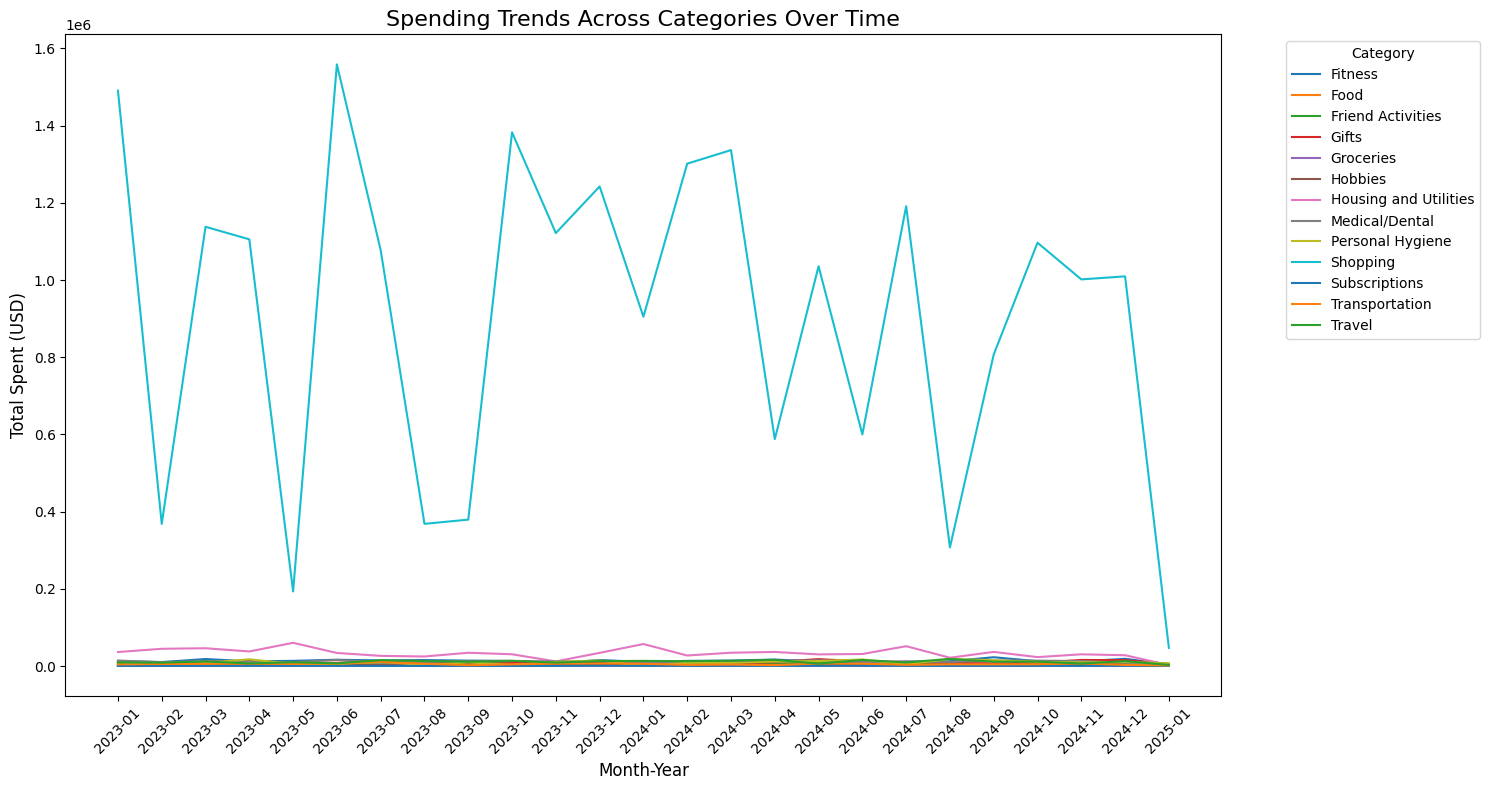

In [4]:
# Plot 1: Line chart for spending trends over time
plt.figure(figsize=(15, 8))
for category in trend_pivot.columns:
    plt.plot(trend_pivot.index.astype(str), trend_pivot[category], label=category)

plt.title('Spending Trends Across Categories Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Spent (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

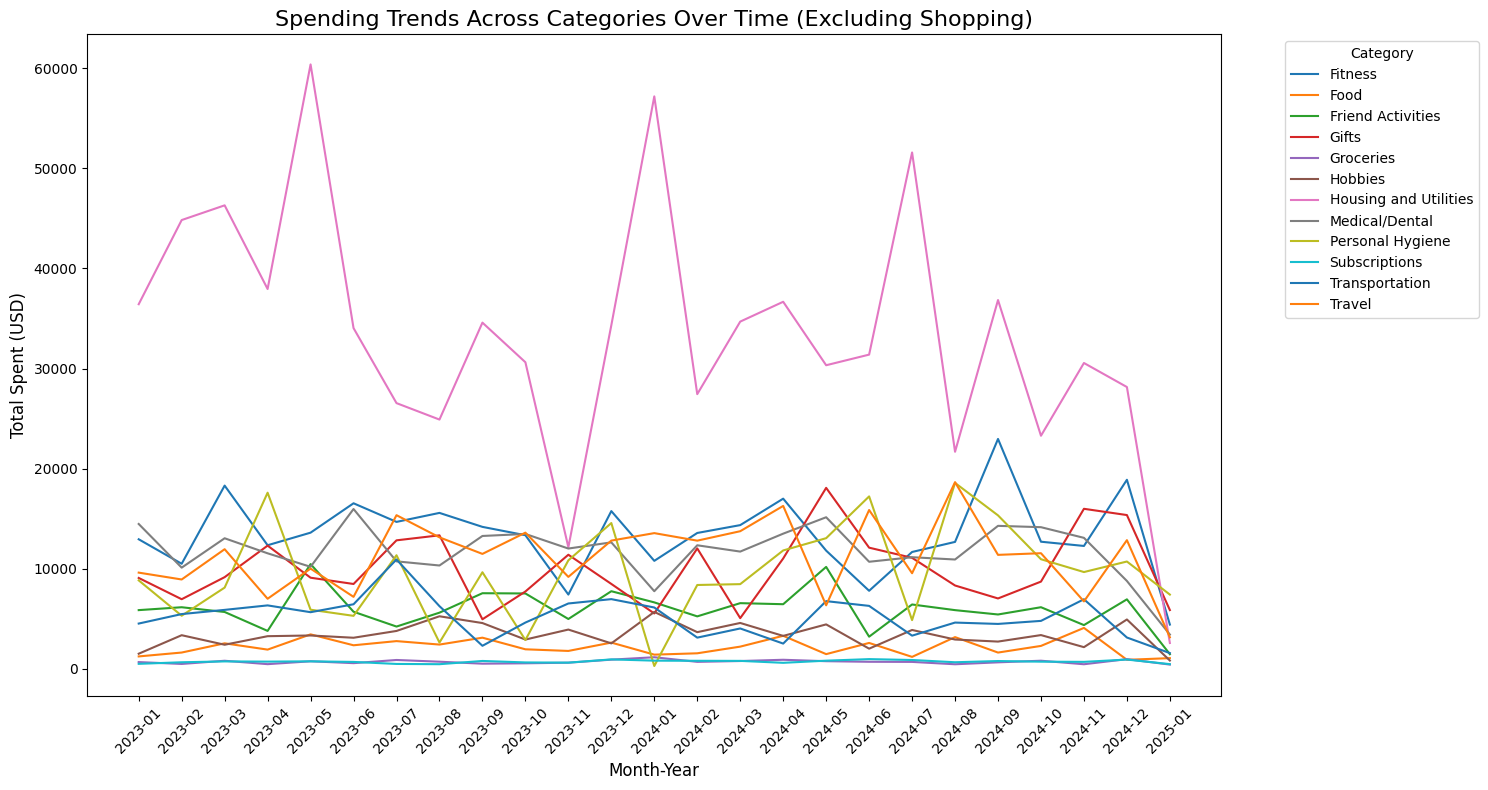

In [5]:
# Plot 1: Line chart for spending trends over time (excluding Shopping category)
plt.figure(figsize=(15, 8))

# Exclude the 'Shopping' category
for category in trend_pivot.columns:
    if category != 'Shopping':  # Filter out 'Shopping'
        plt.plot(trend_pivot.index.astype(str), trend_pivot[category], label=category)

plt.title('Spending Trends Across Categories Over Time (Excluding Shopping)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Spent (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

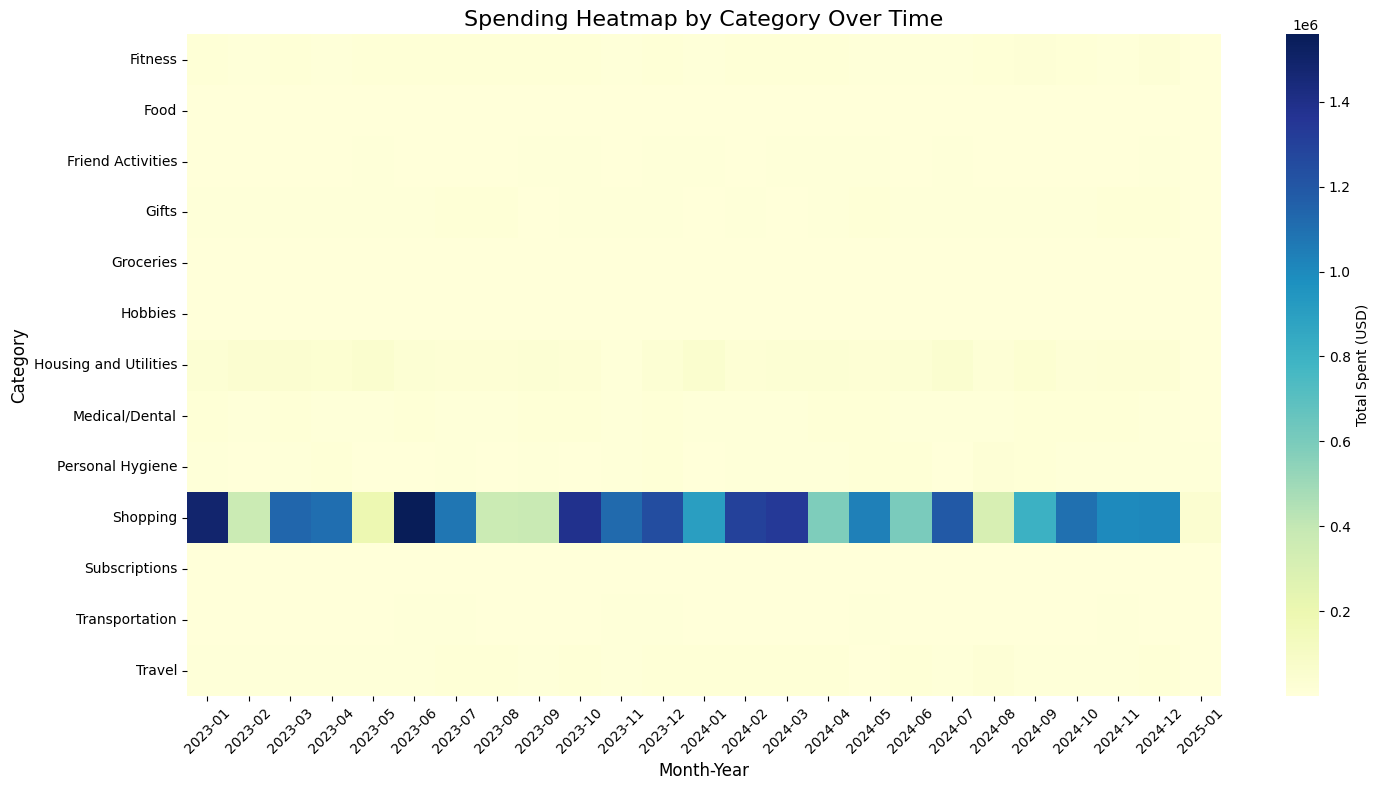

In [6]:
# Plot 2: Heatmap for spending trends by category and time
plt.figure(figsize=(15, 8))
sns.heatmap(trend_pivot.T, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Total Spent (USD)'})
plt.title('Spending Heatmap by Category Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

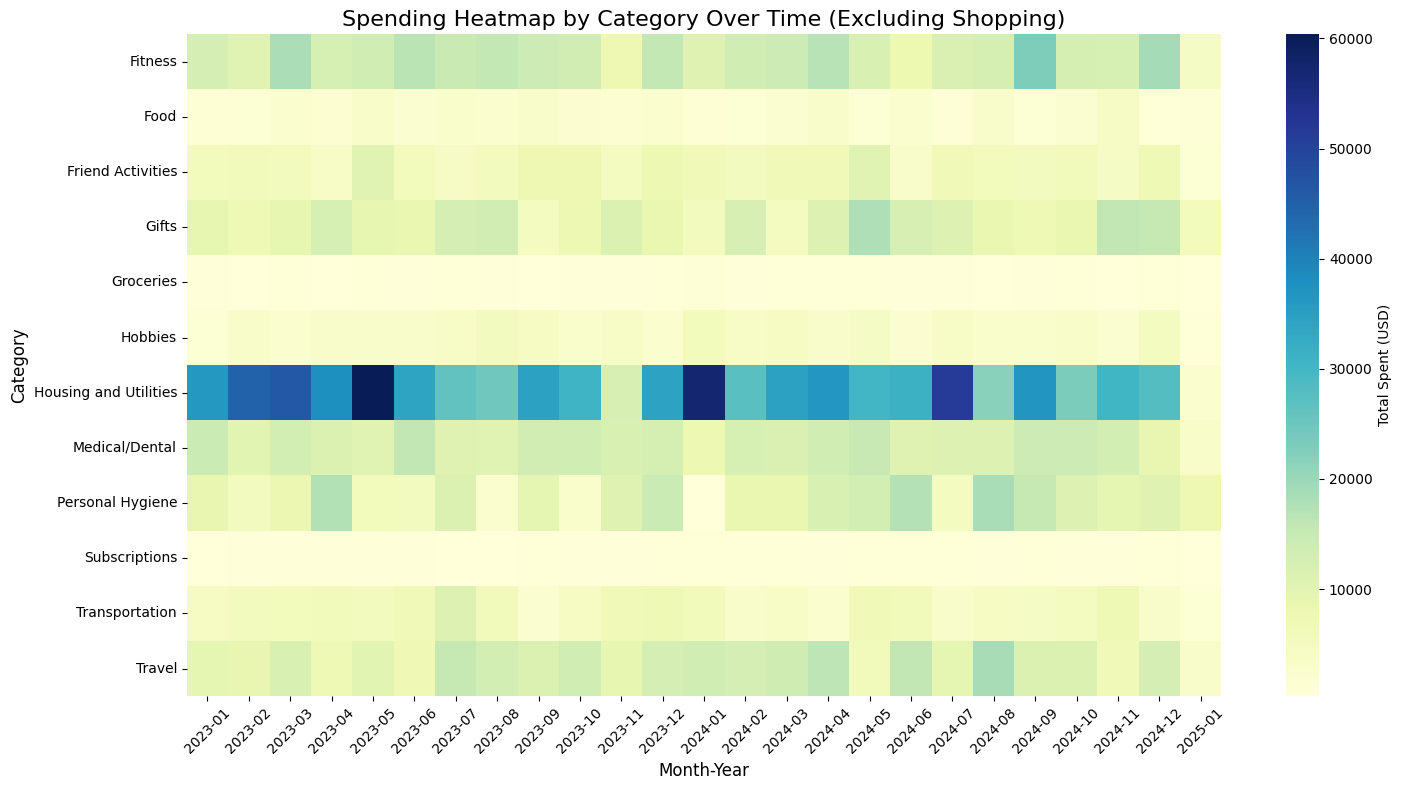

In [7]:
# Exclude the 'Shopping' category from the data
trend_pivot_excluded = trend_pivot.drop(columns=['Shopping'], errors='ignore')

# Plot 2: Heatmap for spending trends by category and time (excluding 'Shopping')
plt.figure(figsize=(15, 8))
sns.heatmap(trend_pivot_excluded.T, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Total Spent (USD)'})
plt.title('Spending Heatmap by Category Over Time (Excluding Shopping)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Optional: Analyze spikes during holidays or seasons
holiday_months = [12]  # December for analyzing Gift category spikes
holiday_trends = trend_data[data['Month'].isin(holiday_months) & (data['Category'] == 'Gifts')]

<ipython-input-8-f28646061564>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  holiday_trends = trend_data[data['Month'].isin(holiday_months) & (data['Category'] == 'Gifts')]


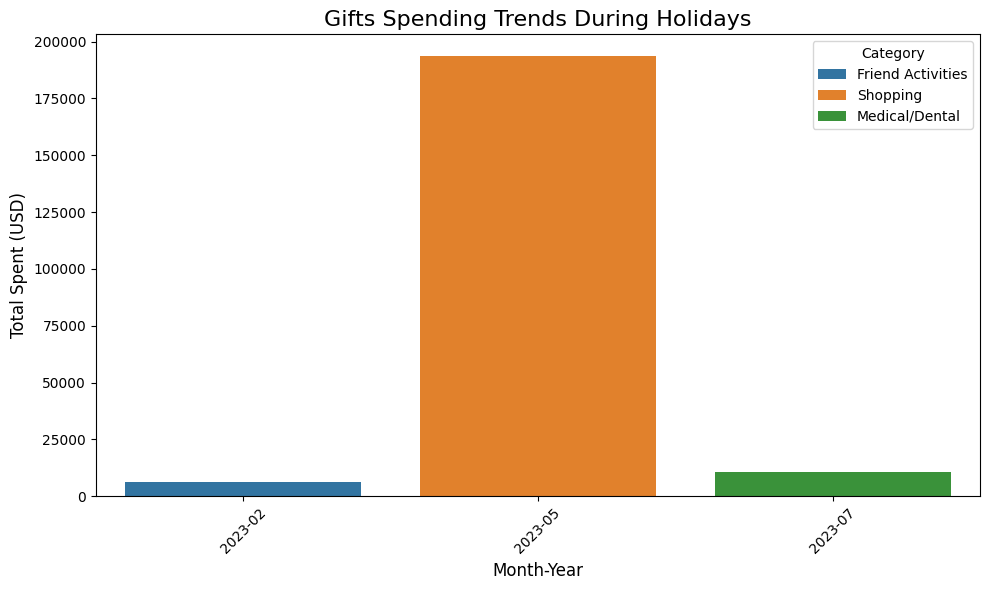

In [9]:
# Plot 3: Bar chart for holiday season spending
plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_trends, x='Month-Year', y='Total Spent', hue='Category', dodge=False)
plt.title('Gifts Spending Trends During Holidays', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Spent (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

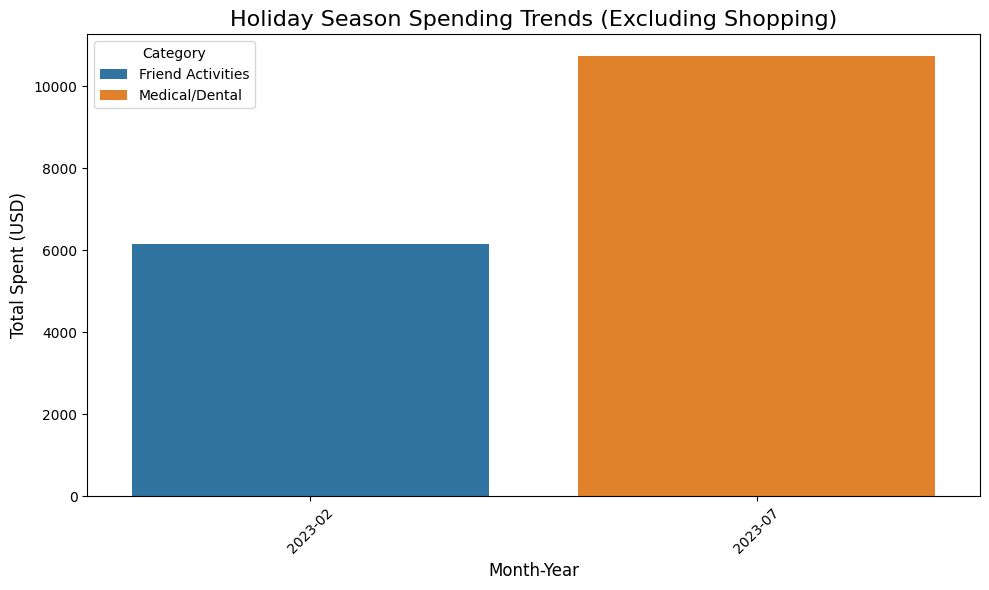

In [10]:
# Filter out the 'Shopping' category from the holiday trends data
holiday_trends_filtered = holiday_trends[holiday_trends['Category'] != 'Shopping']

# Plot 3: Bar chart for holiday season spending excluding 'Shopping'
plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_trends_filtered, x='Month-Year', y='Total Spent', hue='Category', dodge=False)
plt.title('Holiday Season Spending Trends (Excluding Shopping)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Spent (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()